# From Data to Careers: A Subreddit Journey through r/datascience and r/jobs


---

## Part 1: Data Wrangling/Gathering/Acquisition


---

#### Introduction

In this section, I will craft a data collection script to retrieve posts from r/datascience and r/jobs, storing information in a structured format. Detailed explanation of the scripts will be highlighted in order to guarantee a continuous flow of relevant data. Emphasis will be placed on user input, API credential storage, and advanced functionality for data cleanup and maintenance.

---

#### Deliverables

- Detailed explanation of the data gathering script
- Ensure effective handling of missing values and outliers
- User input for subreddit selection and API credentials
- Script for data collection and transaction log creation
- Bonus explanation and implementation details with relevant summary statistics


---

#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import requests
import time

# way to obscure inputs, so my info is not pushed to bh repo
import getpass

#for transaction log
import datetime
import json

---

#### Data Gathering and Authorizing

needs to be removed

- client_id = T4fRXhQZ923qoWbOF1mRrQ
- client_secret = NLHXPH6erxSKPne9F84frdSXgebOGA
- user_agent = dsi1113/datascience_jobs
- username = New_Camp1627
- password = *

In [2]:
#function to collect data from Reddit API
def collect_data(subreddit, num_posts=3000):
    
    """
    Collects post data from a specified subreddit 
    using Reddit API.
    
    Parameters: 
    - subreddit (str): The name of the subreddit to 
    collect data from
    - num_posts (int): The desired number of post to 
    collect. Default to 3000
    
    Returns:
    - list: a list containing post data as dictionaries, 
    where each dictionary represent info on reddit post
    
    Note:
    The data is collected in batches until the desired
    number of post is reached. The Authentication detail 
    provide access to the developed application found in reddit.
    The transaction log keeps track of the total number of 
    post retrieved.
    
    Example usage: 
    subreddit_data = collect_data('datascience', num_posts=3000)
    
    """
    
    base_url = 'https://oauth.reddit.com/r/'
    headers = {'User-Agent': 'dsi1113/datascience_jobs'}
    
    #Authentication details
    #alphanumeric string provided under "personal use script"
    client_id =  getpass.getpass()
    #alphanumeric string provided as "secret"
    client_secret = getpass.getpass()
    # name of my application
    user_agent = getpass.getpass()
    #reddit username
    username = getpass.getpass()
    #reddit password
    password = getpass.getpass()
    
    #retrieve access token, authentication framework
    auth = requests.auth.HTTPBasicAuth(client_id, client_secret)
    
    #data collection script
    data = {
    #the type of authorization being requested when exchanging the user's credentials
    'grant_type': 'password',
    'username': username,
    'password': password
    }
    
    # Loop to collect data until reaching the desired number of posts
    posts_data = []
    after = None
    cumulative_posts_retrieved = 0
    
    while len(posts_data) < num_posts:
        params = {'limit': min(100, num_posts - len(posts_data)), 'after': after} if after else {'limit': min(100, num_posts - len(posts_data))}
        res = requests.get(f'{base_url}{subreddit}/new.json', headers=headers, params=params, auth=auth)
        
        if res.status_code == 200:
            response_data = res.json()
            posts_data.extend(response_data['data']['children'])
            after = response_data['data']['after']  # 'after' parameter for paginating through posts
            cumulative_posts_retrieved += len(response_data['data']['children'])
        else:
            print(f"Error: {res.status_code}")
            break
            
    #log transaction detail
    transaction_log = {
        'execution_datetime': str(datetime.datetime.now()),
        'posts_retrieved': len(posts_data),
        'total_posts_retrieved_to_date': cumulative_posts_retrieved + len(posts_data)
    }
    #writing to json file
    with open('./data/transaction_log.json', 'a') as log_file:
        log_file.write(json.dumps(transaction_log) + '\n')
            
    return posts_data
    

---

**r/datascience dataframe**

In [3]:
#collects data from the 'datascience' subreddit using the
#collect_data function
subreddit_data = collect_data('datascience', num_posts=3000)

 ········
 ········
 ········
 ········
 ········


In [4]:
##Create a dataframe df_datascience from the collected data
df_datascience = pd.DataFrame([post['data'] for post in subreddit_data])

In [5]:
df_datascience.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,is_video,post_hint,preview,crosspost_parent_list,url_overridden_by_dest,crosspost_parent,media_metadata,is_gallery,gallery_data,author_cakeday
0,None,datascience,"I currently work as a DS, but I still worry ab...",t2_g7jmnu5,False,None,0,False,Are there any up and coming careers that also ...,[],...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,datascience,I’ve heard multiple sentiments from reddit and...,t2_l6lp7fm00,False,None,0,False,Is DS actually dying?,[],...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,datascience,I recently lost out on a gig at an exciting te...,t2_13co83,False,None,0,False,Advice from FAANG: Experimental Design,[],...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,datascience,"Interviewed about 3 weeks ago, from what I rea...",t2_8734q0g8,False,None,0,False,"What to expect from a ""Follow up Call""",[],...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,datascience,I’m [M27] currently a Senior Data Analyst in t...,t2_1x2kyanz,False,None,0,False,Is imposter syndrome in data analytics/science...,[],...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_datascience.shape

(3000, 116)

---

**r/jobs dataframe**

In [7]:
#collects data from the 'jobs' subreddit using the
#collect_data function
subreddit_data2 = collect_data('jobs', num_posts=3000)

 ········
 ········
 ········
 ········
 ········


In [8]:
#Create a dataframe df_jobs from the collected data
df_jobs = pd.DataFrame([post['data'] for post in subreddit_data2])

In [9]:
df_jobs.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,is_video,post_hint,url_overridden_by_dest,preview,is_gallery,media_metadata,gallery_data,author_cakeday,crosspost_parent_list,crosspost_parent
0,None,jobs,Once an employer has officially offered someon...,t2_cj9cz9c1d,False,None,0,False,How much time do employers give employees to f...,"[{'e': 'text', 't': 'Onboarding'}]",...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,None,jobs,Im a preschool teacher at a private school who...,t2_m8vw3e2p7,False,None,0,False,Jobs in Education w/ the LEAST amount of Socia...,"[{'e': 'text', 't': 'Job searching'}]",...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,None,jobs,"20(M), good at networking, great at communicat...",t2_3pce29u0,False,None,0,False,What job is worth doing?,"[{'e': 'text', 't': 'Career planning'}]",...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,None,jobs,I got fired last year and filled for unemploym...,t2_80hgpuw2,False,None,0,False,Is my old job required answer me about my W2?,"[{'e': 'text', 't': 'Leaving a job'}]",...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,None,jobs,"So long story short, i live in the middle east...",t2_3vjrgtdv,False,None,0,False,Is thats it for me?,"[{'e': 'text', 't': 'Job searching'}]",...,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_jobs.shape

(3000, 116)

---

### Data Cleaning and EDA

Columns dictionary:
- selftext: is the body of the post, containing the main content
- title: The title of the post
- gilded: The number of awards the post has received
- author_fullname: The unique identifier of the author of the post
- subreddit: The name of the subreddit
- upvote_ratio: The ratio of upvotes to total votes for a post.
- score: The overall score of a post, calculated as upvotes minus downvotes.
- num_comments: The number of comments a post has received. 

Deliverables:
- handle missing values and outliers
    - drop colums if all values are missing
    - Remove duplicated post
    - Remove post where word count is 0
- examine data distribution
    - explore the distribution of text length
    - plot histogram or bloxplot
    - analyze word frequencies
    - examine common words and term
    - compute summary statistic for self text
- create new columns for word count and length based on selftext

**r/datascience**

In [11]:
df_datascience.isnull().sum()

approved_at_utc     3000
subreddit              0
selftext               0
author_fullname       47
saved                  0
                    ... 
crosspost_parent    2968
media_metadata      2892
is_gallery          2996
gallery_data        2996
author_cakeday      2992
Length: 116, dtype: int64

In [12]:
#drop columns where 50% of the values are missing
# threshold = 0.5 * len(df_datascience)
# df_datascience.dropna(axis=1, thresh=threshold, inplace=True)

In [13]:
#Drop columns if all the value are missing
df_datascience.dropna(axis=1, how='all', inplace=True)

In [14]:
df_datascience.shape

(3000, 98)

In [15]:
#Check for duplicates in the 'selftext' column
duplicates_mask = df_datascience['selftext'].duplicated()
duplicates_mask

0       False
1       False
2       False
3       False
4       False
        ...  
2995     True
2996     True
2997     True
2998     True
2999     True
Name: selftext, Length: 3000, dtype: bool

In [16]:
# Remove duplicate posts based on selftext column
df_datascience = df_datascience.drop_duplicates(subset='selftext')

In [17]:
df_datascience.shape

(711, 98)

In [18]:
# Display the first few rows of the '...' column
#cant find unique value because there are unhashable type
print(df_datascience['post_hint'].head(10))

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8    self
9     NaN
Name: post_hint, dtype: object


In [19]:
#examine the data distribution
df_datascience.describe()

,gilded,pwls,downs,thumbnail_height,upvote_ratio,ups,total_awards_received,thumbnail_width,score,created,wls,num_comments,subreddit_subscribers,created_utc,num_crossposts
count,711.0,711.0,711.0,36.000000,711.000000,711.000000,711.0,36.0,711.000000,7.110000e+02,711.0,711.000000,7.110000e+02,7.110000e+02,711.000000
mean,0.0,6.0,0.0,98.138889,0.810323,43.675105,0.0,140.0,43.675105,1.699827e+09,6.0,32.413502,1.229854e+06,1.699827e+09,0.040788
std,0.0,0.0,0.0,35.706864,0.174705,85.702005,0.0,0.0,85.702005,2.211663e+06,0.0,45.122376,3.343125e-01,2.211663e+06,0.242688
min,0.0,6.0,0.0,28.000000,0.200000,0.000000,0.0,140.0,0.000000,1.697026e+09,6.0,0.000000,1.229853e+06,1.697026e+09,0.000000
25%,0.0,6.0,0.0,71.000000,0.740000,2.000000,0.0,140.0,2.000000,1.697821e+09,6.0,5.000000,1.229854e+06,1.697821e+09,0.000000
50%,0.0,6.0,0.0,99.000000,0.860000,12.000000,0.0,140.0,12.000000,1.699319e+09,6.0,16.000000,1.229854e+06,1.699319e+09,0.000000
75%,0.0,6.0,0.0,135.500000,0.940000,49.000000,0.0,140.0,49.000000,1.701719e+09,6.0,41.000000,1.229854e+06,1.701719e+09,0.000000
max,0.0,6.0,0.0,140.000000,1.000000,835.000000,0.0,140.0,835.000000,1.704519e+09,6.0,375.000000,1.229854e+06,1.704519e+09,3.000000


In [20]:
#Create a column selftext_length that contain the
#length of each body of post
df_datascience['selftext_length'] = df_datascience['selftext'].apply(len)
df_datascience.head()

,subreddit,selftext,author_fullname,saved,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,...,post_hint,preview,crosspost_parent_list,url_overridden_by_dest,crosspost_parent,media_metadata,is_gallery,gallery_data,author_cakeday,selftext_length
0,datascience,"I currently work as a DS, but I still worry ab...",t2_g7jmnu5,False,0,False,Are there any up and coming careers that also ...,[],r/datascience,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,397
1,datascience,I’ve heard multiple sentiments from reddit and...,t2_l6lp7fm00,False,0,False,Is DS actually dying?,[],r/datascience,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,941
2,datascience,I recently lost out on a gig at an exciting te...,t2_13co83,False,0,False,Advice from FAANG: Experimental Design,[],r/datascience,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,669
3,datascience,"Interviewed about 3 weeks ago, from what I rea...",t2_8734q0g8,False,0,False,"What to expect from a ""Follow up Call""",[],r/datascience,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524
4,datascience,I’m [M27] currently a Senior Data Analyst in t...,t2_1x2kyanz,False,0,False,Is imposter syndrome in data analytics/science...,[],r/datascience,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1734


In [21]:
#column called selftext_word_count that contains 
#the number of words in each body of post:
df_datascience['selftext_word_count'] = df_datascience['selftext'].apply(str.split).apply(len)
df_datascience.head()

,subreddit,selftext,author_fullname,saved,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,...,preview,crosspost_parent_list,url_overridden_by_dest,crosspost_parent,media_metadata,is_gallery,gallery_data,author_cakeday,selftext_length,selftext_word_count
0,datascience,"I currently work as a DS, but I still worry ab...",t2_g7jmnu5,False,0,False,Are there any up and coming careers that also ...,[],r/datascience,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,397,67
1,datascience,I’ve heard multiple sentiments from reddit and...,t2_l6lp7fm00,False,0,False,Is DS actually dying?,[],r/datascience,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,941,185
2,datascience,I recently lost out on a gig at an exciting te...,t2_13co83,False,0,False,Advice from FAANG: Experimental Design,[],r/datascience,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,669,110
3,datascience,"Interviewed about 3 weeks ago, from what I rea...",t2_8734q0g8,False,0,False,"What to expect from a ""Follow up Call""",[],r/datascience,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524,95
4,datascience,I’m [M27] currently a Senior Data Analyst in t...,t2_1x2kyanz,False,0,False,Is imposter syndrome in data analytics/science...,[],r/datascience,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1734,290


In [22]:
#Remove rows where 'selftext_word_count' is 0
df_datascience = df_datascience[df_datascience['selftext_word_count'] > 0]

---
**Create a dataframe that shows the five longest and five shortest selftext based off of selftext_word_count:**

In [23]:
# Set the maximum display width for columns
pd.options.display.max_colwidth = 400

In [24]:
# longest selftext
df_long_short = df_datascience.sort_values(by='selftext_word_count')

In [25]:
df_long_short.tail(5)[['selftext', 'selftext_word_count']]

,selftext,selftext_word_count
591,"&amp;#x200B;\n\n## Python\n\nUndoubtedly, **the uncrowned king** of machine learning and data analysis, the ubiquitous language that data scientists turn to for a bit of number crunching, **is Python**. This is down to several reasons; the three most important among them are its **maturity**, the enormous **community**, and, last but not least, a **vast array of robust third-party libraries**....",982
600,"The bulk of this subreddit is filled with people trying to break into data science, completing certifications and getting MS degrees from diploma mills but with no real guidance. Oftentimes the advice I see here is from people without DS jobs trying to help other people without DS jobs on projects etc. It's more or less blind leading the blind.\n\nHere's an insider perspective from me. I'm a h...",1022
558,"# A real-world case study of performance optimization in Numpy\n\nThis article was originally published on my personal blog [Data Leads Future](https://www.dataleadsfuture.com/how-to-optimize-multidimensional-numpy-array-operations-with-numexpr/).\n\n&amp;#x200B;\n\n[ How to Optimize Multidimensional Numpy Array Operations with Numexpr. Photo Credit: Created by Author, Canva. ](https://preview...",1065
62,This article will explain how to use [Pipeline](https://scikit-learn.org/stable/modules/compose.html?ref=dataleadsfuture.com) and [Transformers](https://scikit-learn.org/stable/data_transforms.html?ref=dataleadsfuture.com) correctly in Scikit-Learn (sklearn) projects to speed up and reuse our model training process.\n\nThis piece complements and clarifies the official documentation on Pipeli...,1636
407,"Applying to jobs online is like navigating a maze.\n\nAmidst the special torture that is resume parsing software, the inability to reuse information across different application tracking systems (ATS), and the existence of a certain company that rhymes with every day of the week, it can get pretty frustrating.\n\nI wanted to explore what factors make a job application more or less frustrating....",2968


In [26]:
#shortest selftext
df_long_short.head(10)[['selftext', 'selftext_word_count']]

,selftext,selftext_word_count
460,Title,1
769,&amp;#x200B;,1
735,https://preview.redd.it/ha6kw13ewztb1.png?width=966&amp;format=png&amp;auto=webp&amp;s=53c4b89cb5c003c689a1b0b1a62c8902e907c8df\n\n&amp;#x200B;,2
772,[https://github.com/jinyus/related\_post\_gen](https://github.com/jinyus/related_post_gen)\n\nhttps://preview.redd.it/ii0dm13dymtb1.png?width=849&amp;format=png&amp;auto=webp&amp;s=6cd6064d23e26958abe65cdf48e73e688f3d5f4f,2
366,https://www.insider.com/robot-crushed-man-death-mistook-him-box-vegetables-south-korea-2023-11?utm_medium=social&amp;utm_source=facebook&amp;utm_campaign=business-sf&amp;fbclid=IwAR1rGAXkb4sKaZRyvbRCZ6rwwunq04aIndfrcTZKppk1KD4b5fzBLrQOc4k what are you thoughts?,5
241,Sharing this interesting blogpost: [https://medium.com/@seckindinc/data-profiling-with-python-36497d3a1261](https://medium.com/@seckindinc/data-profiling-with-python-36497d3a1261),5
379,Just curious more than anythin,5
414,Curious about the DS arena,5
369,What does this mean for us?,6
103,Just curious what everyone's working on.,6


---

### Visualization r/datascience

**The visual distributions of post lengths. Shows both the distribution of word counts and the distribution of lengths based off character.**

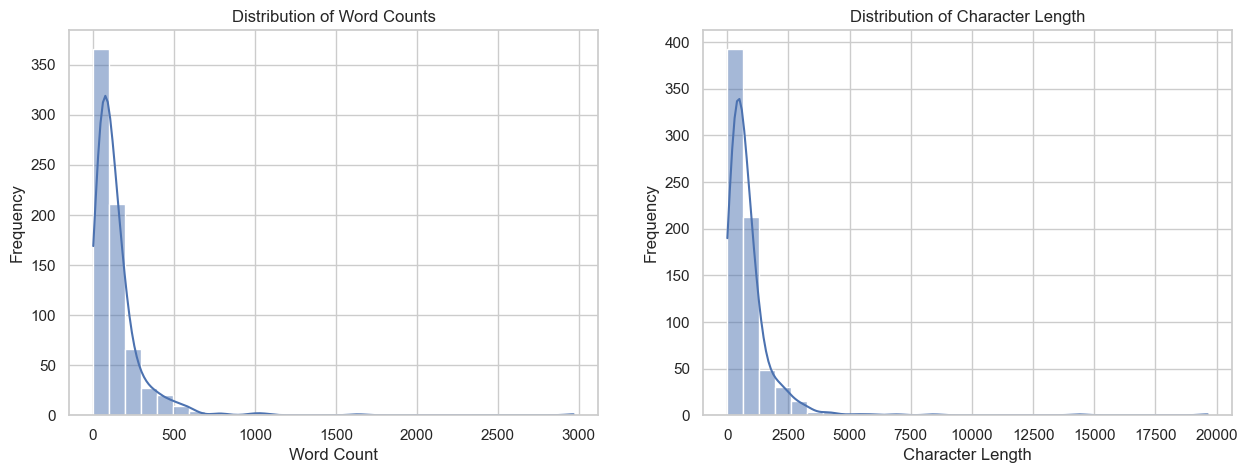

In [50]:
sns.set(style="whitegrid")
#create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#distribution of word counts
sns.histplot(df_datascience['selftext_word_count'], 
             bins=30,kde=True, ax=ax[0])
ax[0].set_title('Distribution of Word Counts')
ax[0].set_xlabel('Word Count')
ax[0].set_ylabel('Frequency')

#distribution of character lengths
sns.histplot(df_datascience['selftext_length'], 
             bins=30,kde=True, ax=ax[1])
ax[1].set_title('Distribution of Character Length')
ax[1].set_xlabel('Character Length')
ax[1].set_ylabel('Frequency')
plt.savefig('../images/dsword_Count_and_char_leng.png', bbox_inches='tight')

**Interpretation**

The distribution are right skewed. For word counts it means that the majority of text in the body of topic titles on reddit tend to be shorter with only a small propotion having large number of word. Similiar with character length. Most users tend to write short post.

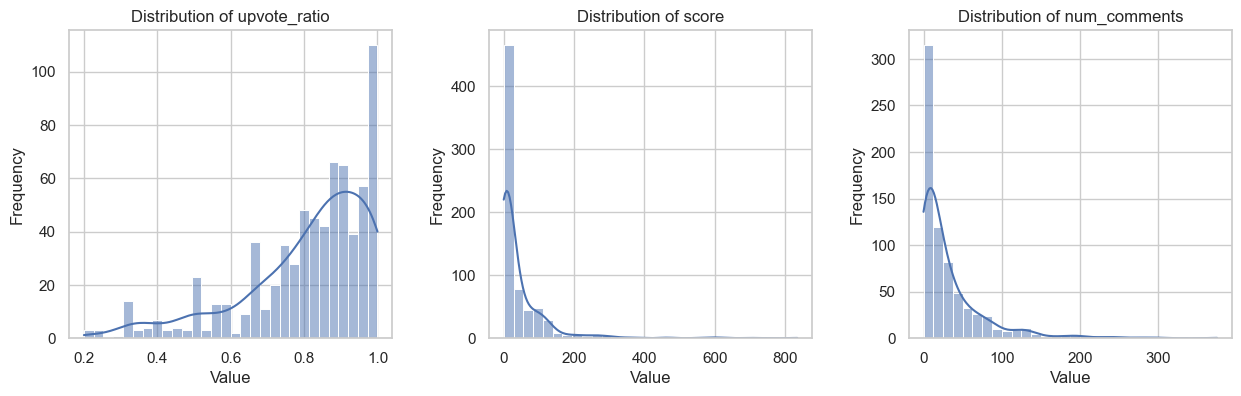

In [28]:
# Columns of interest
selected_columns = ['upvote_ratio', 'score', 'num_comments']

# Set the style
sns.set(style="whitegrid")

# Create subplot
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
plt.subplots_adjust(wspace=0.3)

# Avoid the creation of nested for loops for easier indexing
ax = ax.flatten()

# Plot distribution for each column
for i, column in enumerate(selected_columns):
    sns.histplot(df_datascience[column], bins=30, kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {column}')
    ax[i].set_xlabel('Value')
    ax[i].set_ylabel('Frequency')


**Interpretation**
1. Score: The distribution of scores is right-skewed, suggesting that a significant portion of posts have relatively low scores, but some have higher scores.
2. Upvote Ratio: The distribution is left-skewed, suggesting that most posts receive a high proportion of upvotes.
3. Number of Comments: The distribution of the number of comments is right-skewed, suggesting that most posts have a relatively low number of comments, but some posts have a higher level of engagement.


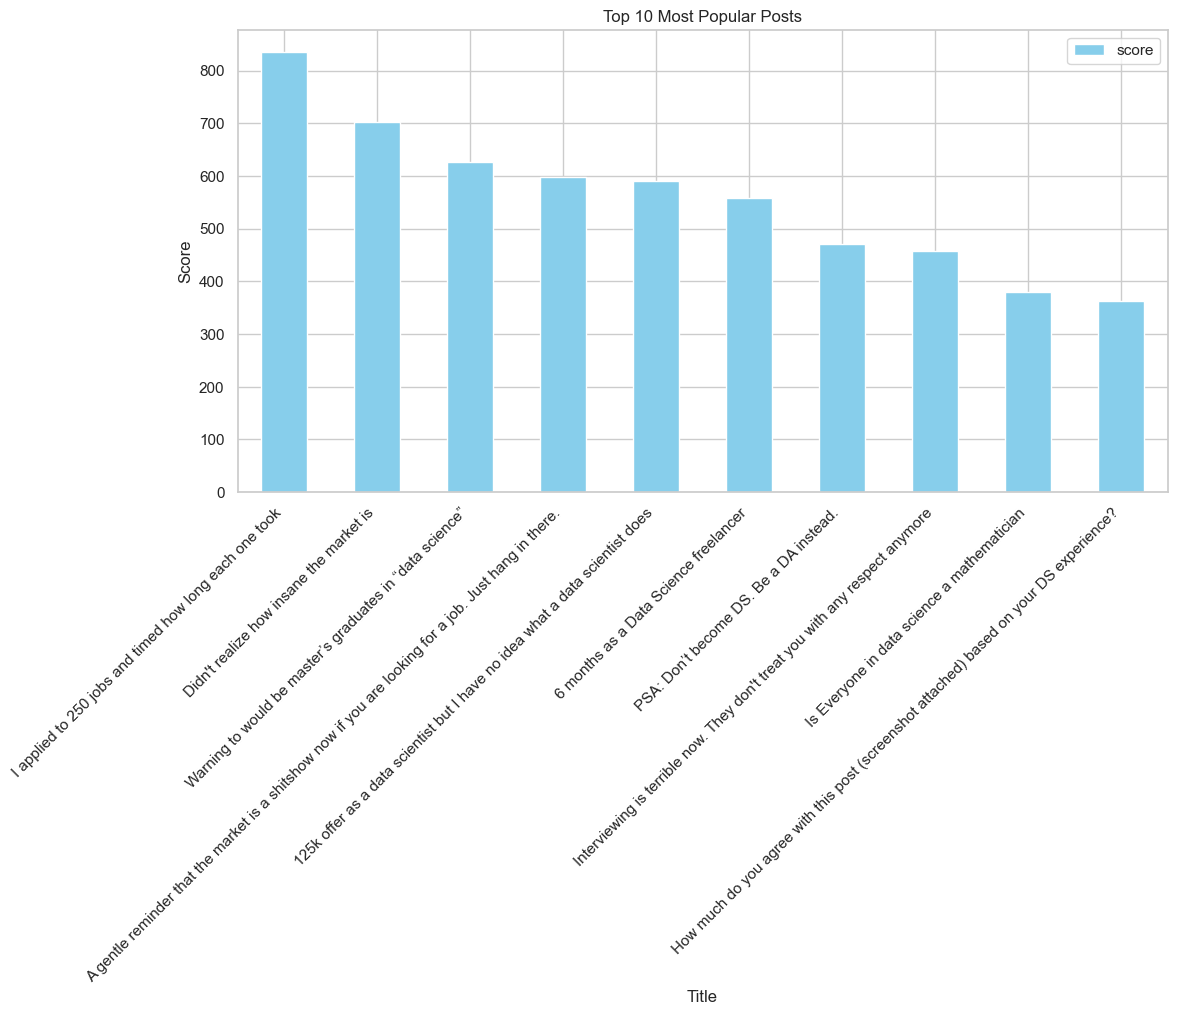

In [52]:
#this code shows visualization of most popular post sorted by score

#sort df by 'score' in desc to get most popular post first
df_sorted_score = df_datascience.sort_values(by='score', ascending=False)

#relavant column for bar chart
popular_posts_score = df_sorted_score.head(10)[['title', 'score']]

#bar chart
fig, ax = plt.subplots(figsize=(12, 6))
popular_posts_score.plot(kind='bar', x='title', y='score', ax=ax, color='skyblue')
ax.set_title('Top 10 Most Popular Posts')
ax.set_xlabel('Title')
ax.set_ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/dsmostpopularpost.png', bbox_inches='tight')
plt.show()


In [49]:
popular_posts_score.head()

,title,score
407,I applied to 250 jobs and timed how long each one took,835
461,Didn't realize how insane the market is,703
725,Warning to would be master’s graduates in “data science”,627
224,A gentle reminder that the market is a shitshow now if you are looking for a job. Just hang in there.,598
231,125k offer as a data scientist but I have no idea what a data scientist does,590


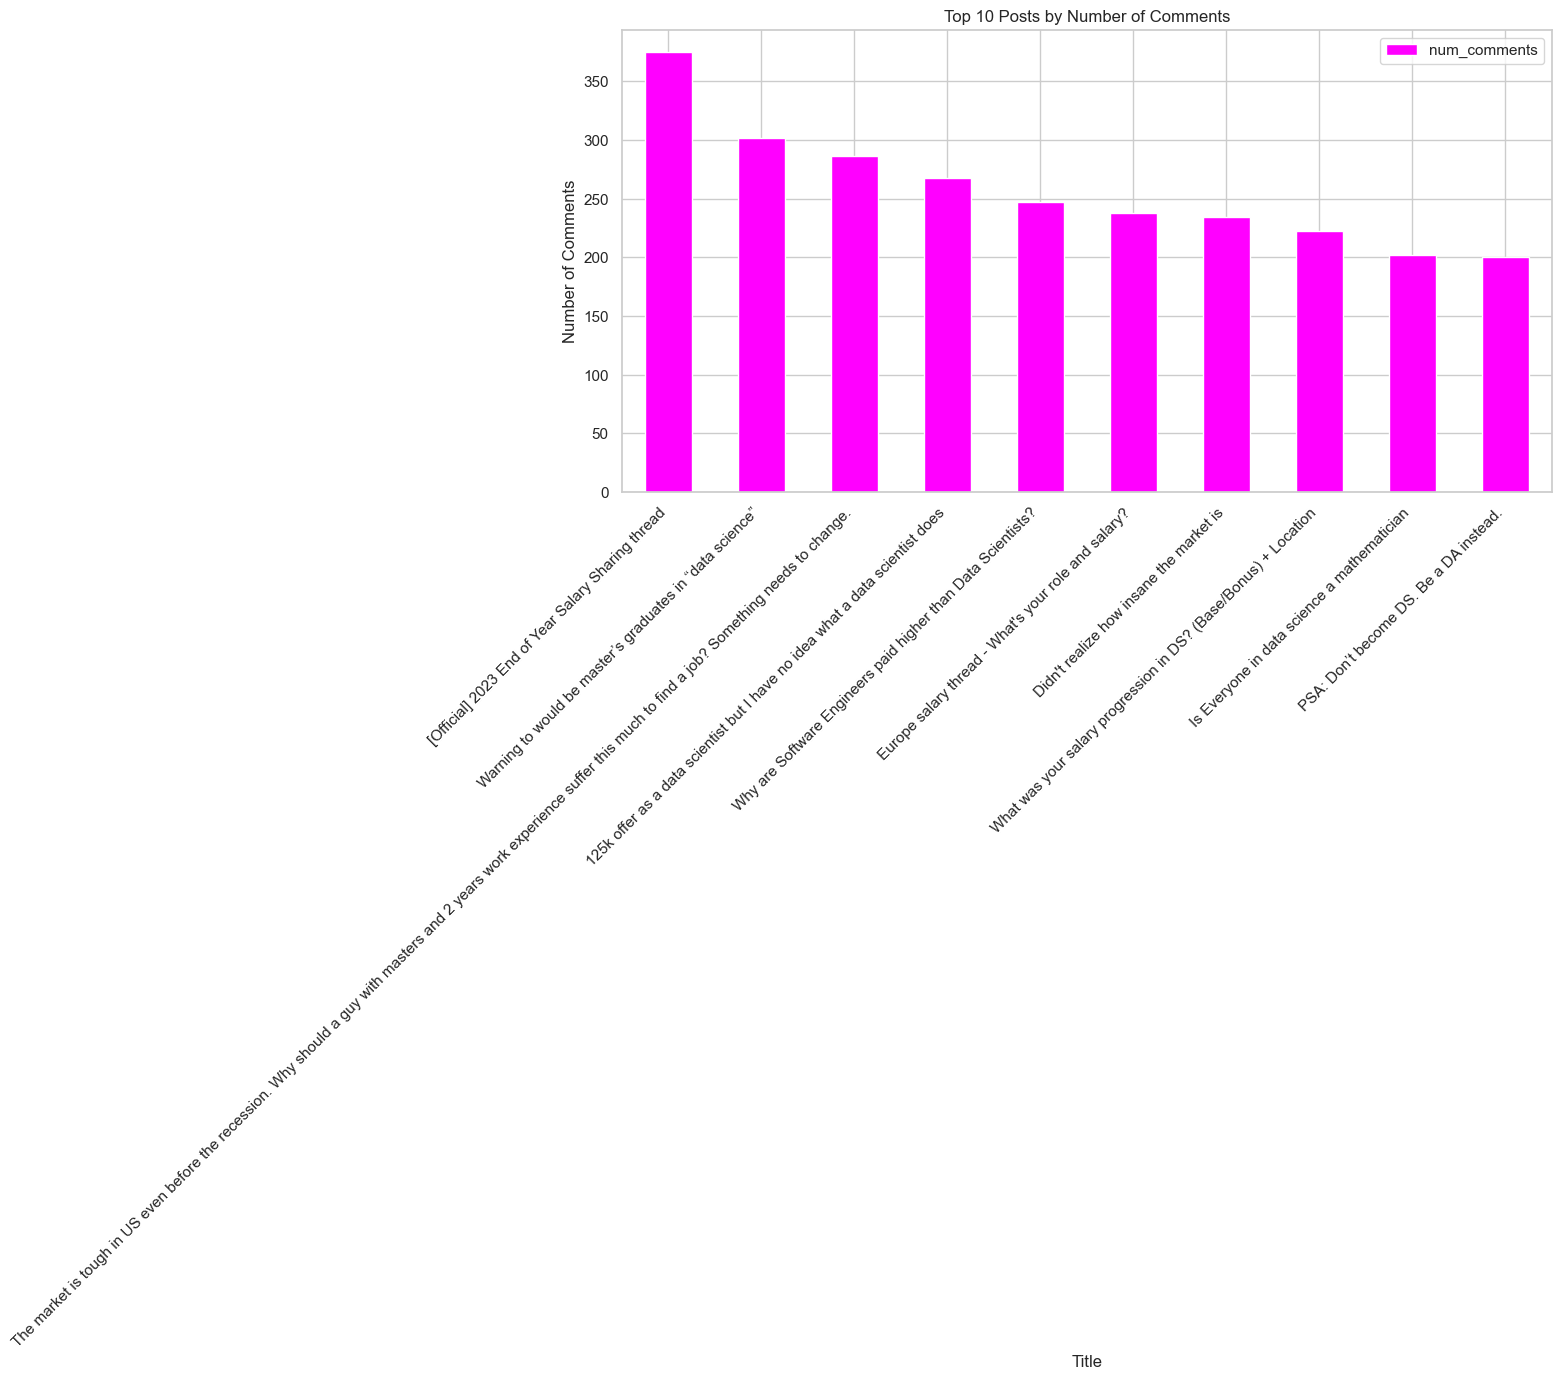

In [30]:
#this code shows visualization of most popular post sorted by comments

# Sort df by num_comments in descending order
df_sorted_num_comments = df_datascience.sort_values(by='num_comments', ascending=False)

#relevant columns for the bar chart
popular_posts_num_comments = df_sorted_num_comments.head(10)[['title', 'num_comments']]

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
popular_posts_num_comments.plot(kind='bar', x='title', y='num_comments', ax=ax, color='fuchsia')
ax.set_title('Top 10 Posts by Number of Comments')
ax.set_xlabel('Title')
ax.set_ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')
plt.show()

**Interpretation**

- The most popular post in r/datascience is titled 'I Applied to 250 Jobs and Timed How Long Each One Took" with upvote of 835. This post provides a quantitative perspective on the job application process, offering insights into the time investment required. It aligns with the project's objective of extracting key characteristics and understanding the dynamics of the job market for data scientists.
- Second popular post is titled "Didn't Realize How Insane the Market Is" with an upvote of 703. The title suggests a realization about the competitive nature of the job market for data scientists. This post gives another great insight towards understanding the perceptions and experiences of individuals in the field. 

These posts reflect a range of emotions, experiences, and challenges faced by individuals, providing a nuanced understanding of potential thematic elements in this subreddit and how some of the linguistic elements can be harnessed to construct a reliable classification model and meet the project objective.

---

### r/jobs

In [31]:
df_jobs.isnull().sum()

approved_at_utc          3000
subreddit                   0
selftext                    0
author_fullname            12
saved                       0
                         ... 
media_metadata           2947
gallery_data             2983
author_cakeday           2993
crosspost_parent_list    2981
crosspost_parent         2981
Length: 116, dtype: int64

In [32]:
#Drop columns if all the value are missing
df_jobs.dropna(axis=1, how='all', inplace=True)

In [33]:
df_jobs.shape

(3000, 96)

In [34]:
#Check for duplicates in the 'selftext' column
duplicates_mask = df_jobs['selftext'].duplicated()
duplicates_mask

0       False
1       False
2       False
3       False
4       False
        ...  
2995     True
2996     True
2997     True
2998     True
2999     True
Name: selftext, Length: 3000, dtype: bool

In [35]:
# Remove duplicate posts based on selftext column
df_jobs = df_jobs.drop_duplicates(subset='selftext')

In [36]:
df_jobs.shape

(868, 96)

In [37]:
#examine the data distribution
df_jobs.describe()

,gilded,pwls,downs,thumbnail_height,upvote_ratio,ups,total_awards_received,thumbnail_width,score,created,wls,num_comments,subreddit_subscribers,created_utc,num_crossposts
count,868.0,868.0,868.0,39.000000,868.000000,868.000000,868.0,39.0,868.000000,8.680000e+02,868.0,868.000000,868.0,8.680000e+02,868.000000
mean,0.0,6.0,0.0,109.333333,0.888802,15.652074,0.0,140.0,15.652074,1.704399e+09,6.0,8.208525,1450919.0,1.704399e+09,0.017281
std,0.0,0.0,0.0,40.163045,0.186382,91.057639,0.0,0.0,91.057639,9.718496e+04,0.0,35.283810,0.0,9.718496e+04,0.168926
min,0.0,6.0,0.0,13.000000,0.170000,0.000000,0.0,140.0,0.000000,1.704231e+09,6.0,0.000000,1450919.0,1.704231e+09,0.000000
25%,0.0,6.0,0.0,71.000000,0.810000,1.000000,0.0,140.0,1.000000,1.704320e+09,6.0,0.000000,1450919.0,1.704320e+09,0.000000
50%,0.0,6.0,0.0,140.000000,1.000000,1.000000,0.0,140.0,1.000000,1.704397e+09,6.0,2.000000,1450919.0,1.704397e+09,0.000000
75%,0.0,6.0,0.0,140.000000,1.000000,2.000000,0.0,140.0,2.000000,1.704482e+09,6.0,4.000000,1450919.0,1.704482e+09,0.000000
max,0.0,6.0,0.0,140.000000,1.000000,1252.000000,0.0,140.0,1252.000000,1.704575e+09,6.0,434.000000,1450919.0,1.704575e+09,3.000000


In [38]:
#Create a column selftext_length that contain the
#length of each body of post
df_jobs['selftext_length'] = df_jobs['selftext'].apply(len)
df_jobs.head()

,subreddit,selftext,author_fullname,saved,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,...,post_hint,url_overridden_by_dest,preview,is_gallery,media_metadata,gallery_data,author_cakeday,crosspost_parent_list,crosspost_parent,selftext_length
0,jobs,"Once an employer has officially offered someone a position, how much time does one have to find an apartment or housing using the proof of income from employer that just offered a position?",t2_cj9cz9c1d,False,0,False,How much time do employers give employees to find housing?,"[{'e': 'text', 't': 'Onboarding'}]",r/jobs,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189
1,jobs,"Im a preschool teacher at a private school who doesn't want to deal with the toxic, annoying, immature teacher culture or kids anymore, but...\n\n1. I love having paid time off for week(s)-long breaks and federal holidays, AND\n2. I don't want to decrease my income (current salary is in the mid $30k range, approx. $20/hr after taxes).\n\nWhat other options for jobs are there in education that ...",t2_m8vw3e2p7,False,0,False,Jobs in Education w/ the LEAST amount of Social Interaction?,"[{'e': 'text', 't': 'Job searching'}]",r/jobs,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,841
2,jobs,"20(M), good at networking, great at communicating and building relationships. I'm a hard worker, I always exceed expectations. I've tried a bit of everything, acting, sales, youth work, admin, sports, car mechanics, church work, farming... I even went through the application process for the CAF before I decided that I didn't want to commit my early twenties to the military. I haven't found any...",t2_3pce29u0,False,0,False,What job is worth doing?,"[{'e': 'text', 't': 'Career planning'}]",r/jobs,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1028
3,jobs,I got fired last year and filled for unemployment. Apparently the owners and old boss got upset because they tried to deny it and got rejected because I got unjustifiedly fired. So they got petty and ignored any type of communication I reached out to them for. The latest is my W2. I messaged my old boss and asked him to mail me my W2 to a new address because I moved out of state. Is he require...,t2_80hgpuw2,False,0,False,Is my old job required answer me about my W2?,"[{'e': 'text', 't': 'Leaving a job'}]",r/jobs,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532
4,jobs,"So long story short, i live in the middle east and i have epilepsy, and because of that I can't seem to find any jobs in my country, situation is very bad, and can't afford any medicine, I don't care about making alot of money, i just hope for the basics and to at least have enough to afford doctors,my brain isn't functioning really good and my memory sometimes be so bad, im willing to work on...",t2_3vjrgtdv,False,0,False,Is thats it for me?,"[{'e': 'text', 't': 'Job searching'}]",r/jobs,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,739


In [39]:
#column called selftext_word_count that contains 
#the number of words in each body of post:
df_jobs['selftext_word_count'] = df_jobs['selftext'].apply(str.split).apply(len)
df_jobs.head()

,subreddit,selftext,author_fullname,saved,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,...,url_overridden_by_dest,preview,is_gallery,media_metadata,gallery_data,author_cakeday,crosspost_parent_list,crosspost_parent,selftext_length,selftext_word_count
0,jobs,"Once an employer has officially offered someone a position, how much time does one have to find an apartment or housing using the proof of income from employer that just offered a position?",t2_cj9cz9c1d,False,0,False,How much time do employers give employees to find housing?,"[{'e': 'text', 't': 'Onboarding'}]",r/jobs,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189,33
1,jobs,"Im a preschool teacher at a private school who doesn't want to deal with the toxic, annoying, immature teacher culture or kids anymore, but...\n\n1. I love having paid time off for week(s)-long breaks and federal holidays, AND\n2. I don't want to decrease my income (current salary is in the mid $30k range, approx. $20/hr after taxes).\n\nWhat other options for jobs are there in education that ...",t2_m8vw3e2p7,False,0,False,Jobs in Education w/ the LEAST amount of Social Interaction?,"[{'e': 'text', 't': 'Job searching'}]",r/jobs,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,841,143
2,jobs,"20(M), good at networking, great at communicating and building relationships. I'm a hard worker, I always exceed expectations. I've tried a bit of everything, acting, sales, youth work, admin, sports, car mechanics, church work, farming... I even went through the application process for the CAF before I decided that I didn't want to commit my early twenties to the military. I haven't found any...",t2_3pce29u0,False,0,False,What job is worth doing?,"[{'e': 'text', 't': 'Career planning'}]",r/jobs,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1028,172
3,jobs,I got fired last year and filled for unemployment. Apparently the owners and old boss got upset because they tried to deny it and got rejected because I got unjustifiedly fired. So they got petty and ignored any type of communication I reached out to them for. The latest is my W2. I messaged my old boss and asked him to mail me my W2 to a new address because I moved out of state. Is he require...,t2_80hgpuw2,False,0,False,Is my old job required answer me about my W2?,"[{'e': 'text', 't': 'Leaving a job'}]",r/jobs,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532,101
4,jobs,"So long story short, i live in the middle east and i have epilepsy, and because of that I can't seem to find any jobs in my country, situation is very bad, and can't afford any medicine, I don't care about making alot of money, i just hope for the basics and to at least have enough to afford doctors,my brain isn't functioning really good and my memory sometimes be so bad, im willing to work on...",t2_3vjrgtdv,False,0,False,Is thats it for me?,"[{'e': 'text', 't': 'Job searching'}]",r/jobs,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,739,149


In [40]:
#Remove rows where 'selftext_word_count' is 0
df_jobs = df_jobs[df_jobs['selftext_word_count'] > 0]

---
**Create a dataframe for jobs that shows the five longest and five shortest selftext based off of selftext_word_count:**

In [41]:
# longest selftext
df_long_short2 = df_jobs.sort_values(by='selftext_word_count')
df_long_short2.tail(5)[['selftext', 'selftext_word_count']]

,selftext,selftext_word_count
840,"Hello everyone, i have been unemployed for almost half a year by now, had 6 interviews in the last 5 months, some went into a 2nd/final round on-site interview, but no offer came out of any of them, I have heard that the economy is not doing great lately so I should not expect too much. Anyhow, naturally I am concerned that maybe I botched the interviews somewhere, something that has especiall...",831
165,"So I've been searching for a job since August of 2022. The journey so far has been hell, and at this point I feel so hopeless and defeated that this was the only place I could think of to share my frustrations as a last resort. I don't know what I'm expecting to come of this, but hopefully someone will have advice or tips or something to help. \n\nI was employed in August 2022. It was a relati...",977
147,"Hi all, I apologize in advance to ask some of you to read so much about me and give me free advice, but I am feeling pretty isolated in my job search. As a lurker on Reddit, I was just hoping to get some advice on how to effectively job search this month. My parents have been very hands-off with the process since they are both older and retired, which leaves me to figure out many of these thin...",1063
782,"# Introduction:\n\nEmbarking on the journey of pursuing an MBA in Digital Marketing is a thrilling choice that can shape your destiny inside the dynamic world of enterprise and technology. However, earlier than you're taking the plunge into this transformative experience, it is important to remember numerous key elements. This article serves as a comprehensive manual, outlining the vital steps...",1160
556,"Yo, Grab a cup because the TEA BE HOT!\nAs some background I’d like to explain what kind of “restaurant” we are. We are a “take and bake” sorta place but not pizza gourmet type of meals, so all meals are pre-made and packaged/labeled in case to buy with instructions on how to heat said food up in an oven. As for my job title not only am I a cook, but I’m expected to man the front while we are ...",1443


In [42]:
#shortest selftext
df_long_short2.head(10)[['selftext', 'selftext_word_count']]

,selftext,selftext_word_count
35,https://www.wsj.com/style/fashion/is-your-linkedin-headshot-holding-you-back-how-to-master-a-stylish-professional-portrait-69549c9f,1
822,https://corecivic.csod.com/ux/ats/careersite/8/home/requisition/23211?c=corecivic&amp;referralToken=dwRqu14GQ0iN1BebMRiG1w,1
421,Title,1
736,Waste of time.,3
101,[Read More ](https://www.jobforme.in/2024/01/mahavitaran-bharti-2024-apply-now-for.html),3
843,Check it out.,3
703,what is going on!!?,4
187,Title is self explanatory,4
41,If so what companies?,4
308,Any Lead will be helpfull 🙏,6


---

### Visualization r/jobs

**The visual distributions of post lengths. Shows both the distribution of word counts and the distribution of lengths based off character.**

Text(0, 0.5, 'Frequency')

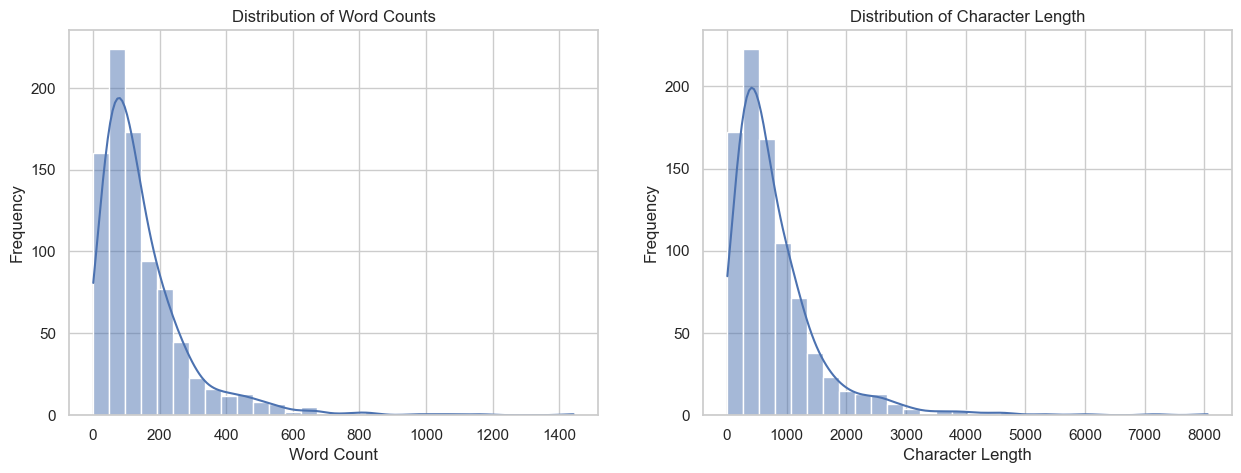

In [43]:
sns.set(style="whitegrid")
#create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

#distribution of word counts
sns.histplot(df_jobs['selftext_word_count'], 
             bins=30,kde=True, ax=ax[0])
ax[0].set_title('Distribution of Word Counts')
ax[0].set_xlabel('Word Count')
ax[0].set_ylabel('Frequency')

#distribution of character lengths
sns.histplot(df_jobs['selftext_length'], 
             bins=30,kde=True, ax=ax[1])
ax[1].set_title('Distribution of Character Length')
ax[1].set_xlabel('Character Length')
ax[1].set_ylabel('Frequency')

**Interpretation**

- selftext_word_count: The distribution is right-skewed. Most posts have a relatively low word count,but there are a few posts with a higher word count, contributing to the long tail on the right side of the distribution.
- selftext_length: The distribution is also right-skewed. The majority of posts have a relatively low character length, but there are a few posts with significantly higher character lengths.

In summary, most posts have relatively short selftext content, but there are some posts with longer selftext, creating a right-skewed distribution in both cases.

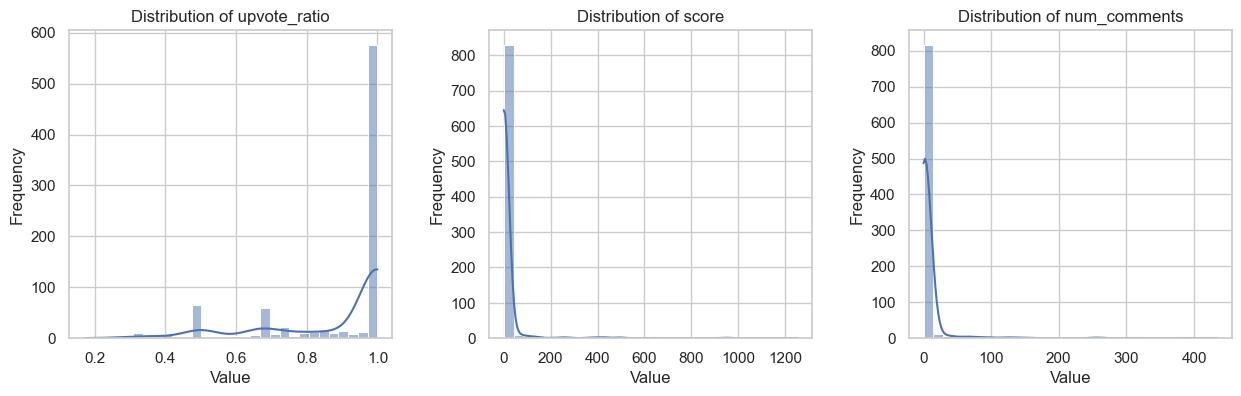

In [44]:
# Columns of interest
selected_columns = ['upvote_ratio', 'score', 'num_comments']

# Set the style
sns.set(style="whitegrid")

# Create subplot
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
plt.subplots_adjust(wspace=0.3)

# Avoid the creation of nested for loops for easier indexing
ax = ax.flatten()

# Plot distribution for each column
for i, column in enumerate(selected_columns):
    sns.histplot(df_jobs[column], bins=30, kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {column}')
    ax[i].set_xlabel('Value')
    ax[i].set_ylabel('Frequency')


**Interpretation**

- Upvote Ratio: The distribution appears to be skewed towards higher values, as indicated by the rightward tail (left-skwedness). There is a moderate spread of upvote ratios, but the bulk of the data is concentrated around the higher end with the the majority of posts having upvote ratios close to 1.0.
- Score: The distribution is highly right-skewed, with a long tail to the right. Most posts have relatively low scores, with a peak in frequency at the lower end of the scale.
- Number of Comments: The distribution is highly right-skewed, where the majority of posts have a low number of comments. 

In summary, most posts tend to have high upvote ratios, while scores and the number of comments are more varied, with a few posts receiving exceptionally high scores and comments

/Users/aamad_000/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129402 (\N{FACE WITH PLEADING EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


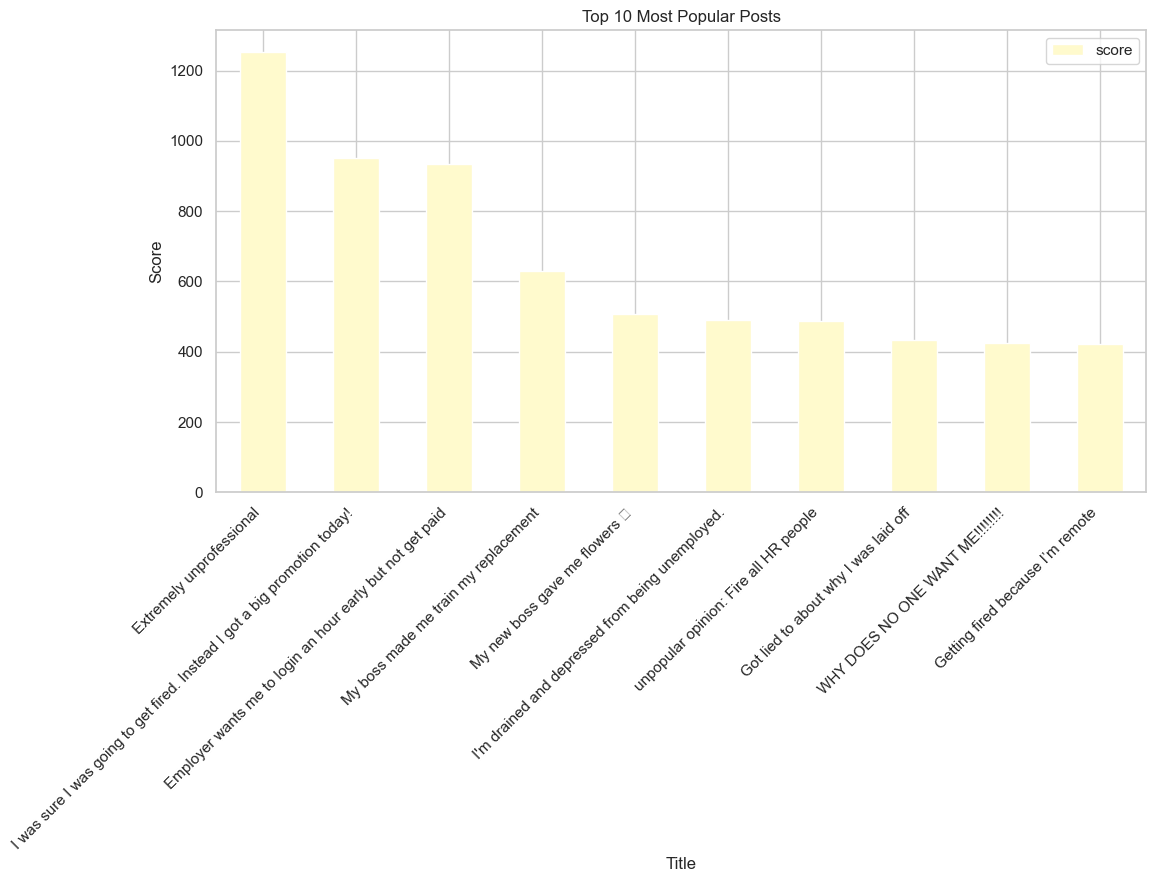

In [45]:
#this code shows visualization of most popular post sorted by score

#sort df by 'score' in desc to get most popular post first
df_sort_score = df_jobs.sort_values(by='score', ascending=False)

#relavant column for bar chart
popular_post_score = df_sort_score.head(10)[['title', 'score']]

#bar chart
fig, ax = plt.subplots(figsize=(12, 6))
popular_post_score.plot(kind='bar', x='title', y='score', ax=ax, color='lemonchiffon')
ax.set_title('Top 10 Most Popular Posts')
ax.set_xlabel('Title')
ax.set_ylabel('Score')
plt.xticks(rotation=45, ha='right')

plt.show()

/var/folders/93/vc04_9w914z957n9_l3tpjp40000gn/T/ipykernel_39564/4053335526.py:16: UserWarning: Glyph 129402 (\N{FACE WITH PLEADING EYES}) missing from current font.
  plt.savefig('../images/jobs_popularpost_bycomments.png', bbox_inches='tight')
/Users/aamad_000/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129402 (\N{FACE WITH PLEADING EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


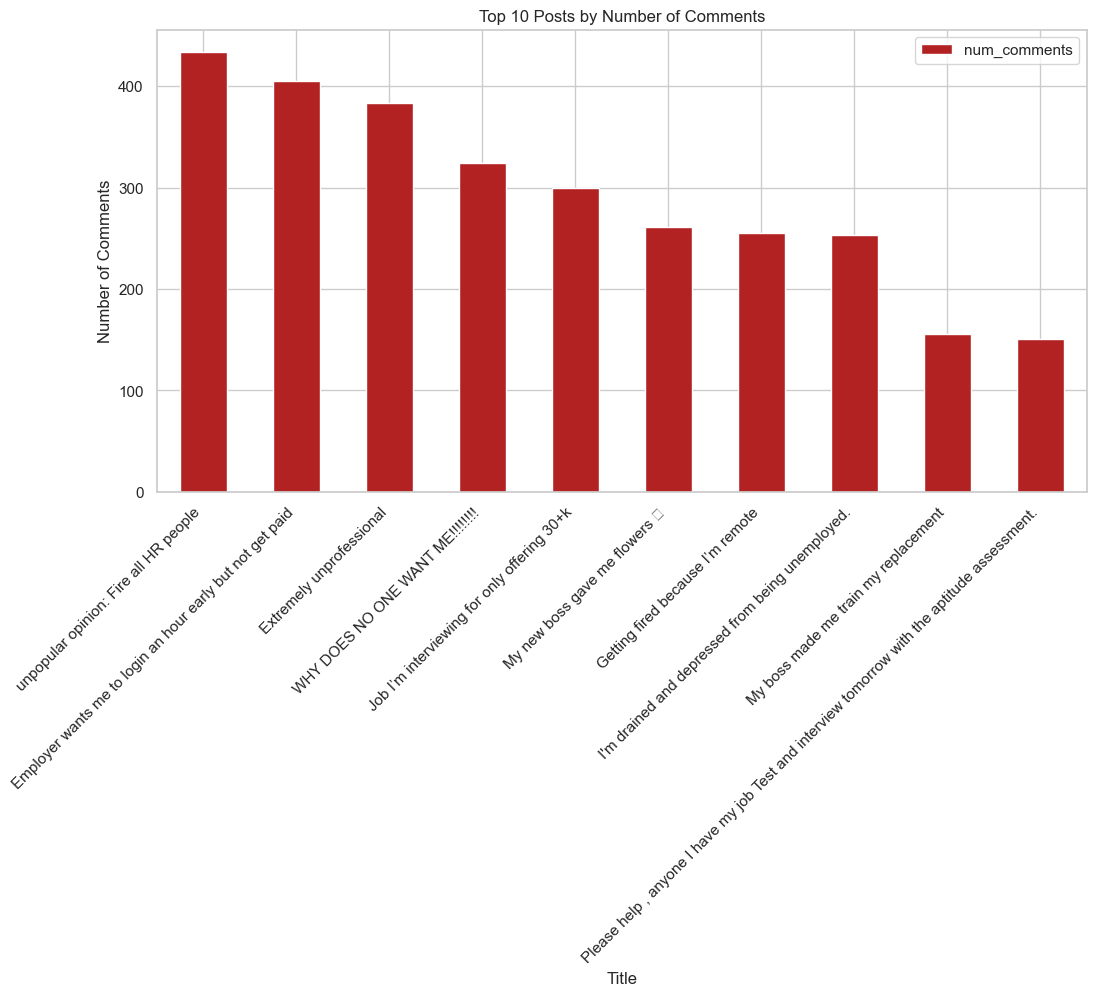

In [53]:
#this code shows visualization of most popular post sorted by comments

# Sort df by num_comments in descending order
df_sort_num_comments = df_jobs.sort_values(by='num_comments', ascending=False)

#relevant columns for the bar chart
popular_post_num_comments = df_sort_num_comments.head(10)[['title', 'num_comments']]

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
popular_post_num_comments.plot(kind='bar', x='title', y='num_comments', ax=ax, color='firebrick')
ax.set_title('Top 10 Posts by Number of Comments')
ax.set_xlabel('Title')
ax.set_ylabel('Number of Comments')
plt.xticks(rotation=45, ha='right')
plt.savefig('../images/jobs_popularpost_bycomments.png', bbox_inches='tight')
plt.show()

**Interpretation**

- The top post in r/jobs by number of comments is to Fire all HR People" with about 434 comments. This post suggests a controversial opinion about HR practices. It aligns with the project's goal of understanding the discussions and concerns within the job-seeking community. It may indicate frustration or dissatisfaction with HR processes. 
- Another interesting post is titled, "WHY DOES NO ONE WANT ME!!!!!!!!" with 343 comments. This post reflects the emotional aspect of job seeking, possibly expressing frustration or distress. Further analyzing such sentiments could contribute to a comprehensive understanding of the challenges faced by individuals in the job market.

These posts reflect a range of emotions, experiences, and challenges faced by individuals, providing a nuanced understanding of potential thematic elements in this subreddit and how some of the linguistic elements can be harnessed to construct a reliable classification model and meet the project objective.


**Save the collected data to a CSV file**

In [166]:
df_datascience.to_csv('./data/rdatascience.csv', index=False)

In [167]:
df_jobs.to_csv('./data/rjobs.csv', index=False)